In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import time
os.chdir(r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\Predict Podcast Listening Time")

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
import pickle
def dump(estimator, name):
    with open(f"{name}.pkl", "wb") as f:
        pickle.dump(estimator, f)

def load(name):
    with open(f"{name}.pkl", "rb") as f:
        return pickle.load(f)


In [3]:
df = pd.read_csv("train.csv")
df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [5]:
df[df["Listening_Time_minutes"] == 0]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
37,37,Funny Folks,Episode 82,5.83,Comedy,46.48,Monday,Evening,31.22,1.0,Negative,0.0
256,256,Athlete's Arena,Episode 15,7.15,Sports,88.31,Saturday,Morning,21.41,1.0,Negative,0.0
276,276,Melody Mix,Episode 59,9.70,Music,58.28,Saturday,Evening,43.37,3.0,Neutral,0.0
325,325,Fitness First,Episode 14,12.43,Health,39.14,Thursday,Evening,35.41,1.0,Negative,0.0
372,372,Business Insights,Episode 81,8.31,Business,46.68,Sunday,Night,67.41,1.0,Negative,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
749689,749689,Criminal Minds,Episode 53,NaN,True Crime,83.65,Thursday,Evening,50.04,3.0,Negative,0.0
749812,749812,Music Matters,Episode 48,NaN,Music,37.21,Saturday,Evening,1.51,1.0,Positive,0.0
749816,749816,Money Matters,Episode 48,10.20,Business,46.68,Saturday,Afternoon,NaN,2.0,Negative,0.0
749912,749912,Game Day,Episode 48,6.60,Sports,67.14,Sunday,Morning,NaN,0.0,Negative,0.0


In [6]:
df[df["Listening_Time_minutes"] > 0]["Listening_Time_minutes"].sort_values().head(50)

457750    0.00056
549988    0.00056
376948    0.00056
150535    0.00056
453624    0.00056
496432    0.00056
544633    0.00056
716342    0.00175
528358    0.00175
740682    0.00175
598580    0.00175
145240    0.00175
651162    0.00175
599396    0.00175
736063    0.00175
252473    0.00661
615919    0.00661
727034    0.00661
614386    0.00661
401410    0.00661
176049    0.00661
47966     0.00661
215568    0.00661
539497    0.00661
194450    0.00661
559003    0.00661
158492    0.00661
570836    0.00661
470018    0.00661
496612    0.00661
636471    0.00661
322712    0.00661
453100    0.00661
20188     0.01050
216748    0.01050
48879     0.01050
200691    0.01050
340566    0.01050
498607    0.01050
592239    0.01050
220048    0.01077
188227    0.01077
558325    0.01077
78962     0.01077
693083    0.01077
185933    0.01077
405447    0.01077
674450    0.01077
332714    0.01077
163520    0.01077
Name: Listening_Time_minutes, dtype: float64

(array([ 23226.,  53429.,  79430.,  97020., 113070., 121380., 113818.,
         82912.,  48976.,  16739.]),
 array([ 0.        ,  2.4324753 ,  4.8649506 ,  7.2974259 ,  9.7299012 ,
        12.16237651, 14.59485181, 17.02732711, 19.45980241, 21.89227771,
        24.32475301]),
 <BarContainer object of 10 artists>)

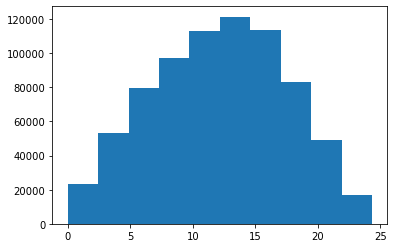

In [7]:
plt.hist(df["Listening_Time_minutes"] 
         ** (1 / 1.5)
)

C:\Users\User\AppData\Local\Temp\ipykernel_13180\2928413636.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="viridis")


<AxesSubplot:>

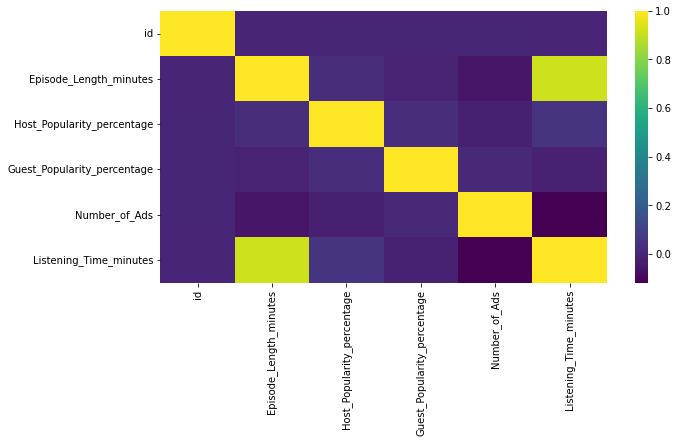

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), cmap="viridis")

<AxesSubplot:xlabel='Episode_Length_minutes', ylabel='Count'>

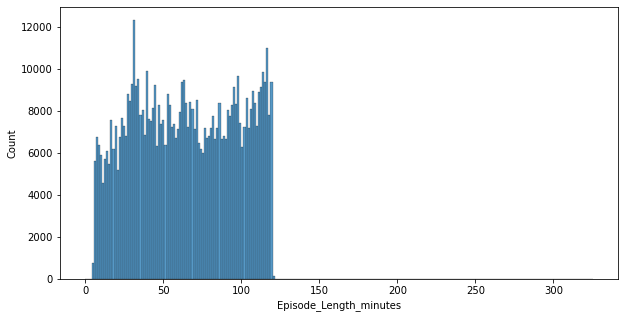

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df["Episode_Length_minutes"], ax=ax)

<AxesSubplot:xlabel='Episode_Length_minutes'>

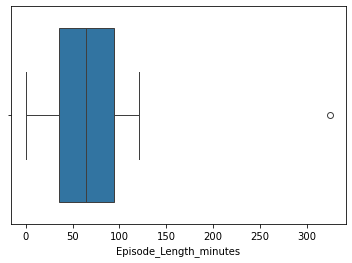

In [10]:
sns.boxplot(df["Episode_Length_minutes"], orient="h")

In [11]:
df[df["Episode_Length_minutes"] > df["Episode_Length_minutes"].quantile(0.99)]["Episode_Length_minutes"]

1         119.80
501       119.09
553       119.04
633       119.11
646       119.66
           ...  
749538    119.88
749564    119.10
749599    119.67
749619    119.59
749737    119.44
Name: Episode_Length_minutes, Length: 6615, dtype: float64

<AxesSubplot:xlabel='Guest_Popularity_percentage'>

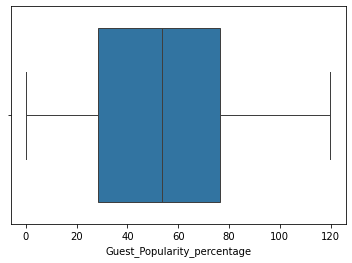

In [12]:
sns.boxplot(df["Guest_Popularity_percentage"], orient="h")

<AxesSubplot:xlabel='Guest_Popularity_percentage', ylabel='Count'>

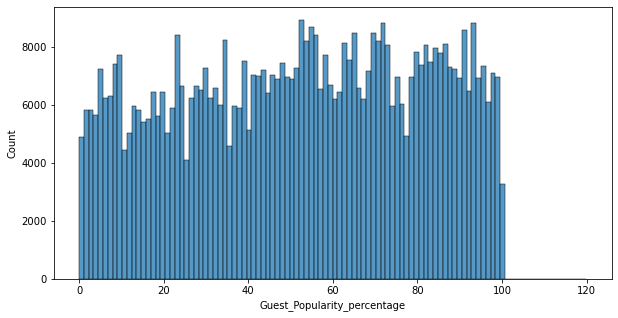

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df["Guest_Popularity_percentage"], ax=ax)

In [14]:
df["Guest_Popularity_percentage"][df["Guest_Popularity_percentage"] > 100]

6770      107.08
32435     114.72
86967     106.90
106804    110.14
118315    102.13
149146    105.48
194629    107.81
202865    114.72
253381    119.91
259197    115.62
291133    102.38
301452    114.88
377317    115.43
471451    115.41
489091    107.34
510609    107.81
654247    115.62
720528    107.58
723350    105.44
Name: Guest_Popularity_percentage, dtype: float64

drop these outliers

In [15]:
drop_outliers = ["Guest_Popularity_percentage"]

In [16]:
print(df["Podcast_Name"].value_counts().shape)
df["Podcast_Name"].value_counts()

(48,)


Tech Talks             22847
Sports Weekly          20053
Funny Folks            19635
Tech Trends            19549
Fitness First          19488
Business Insights      19480
Style Guide            19364
Game Day               19272
Melody Mix             18889
Criminal Minds         17735
Finance Focus          17628
Detective Diaries      17452
Crime Chronicles       17374
Athlete's Arena        17327
Fashion Forward        17280
Tune Time              17254
Business Briefs        17012
Lifestyle Lounge       16661
True Crime Stories     16373
Sports Central         16191
Digital Digest         16171
Humor Hub              16144
Mystery Matters        16002
Comedy Corner          15927
Joke Junction          15074
Wellness Wave          15009
Sport Spot             14778
Gadget Geek            14770
Home & Living          14686
Laugh Line             14673
Life Lessons           14464
World Watch            14043
Sound Waves            13928
Global News            13649
Mind & Body   

Target encoding

In [17]:
tar_encode = ["Podcast_Name"]

In [18]:
df["Episode_Title"].value_counts()

Episode 71    10515
Episode 62    10373
Episode 31    10292
Episode 61     9991
Episode 69     9864
              ...  
Episode 2      5134
Episode 25     5117
Episode 41     4965
Episode 37     4940
Episode 95     4838
Name: Episode_Title, Length: 100, dtype: int64

Target encode

In [19]:
tar_encode.append("Episode_Title")

In [20]:
df["Genre"].value_counts()

Sports        87606
Technology    86256
True Crime    85059
Lifestyle     82461
Comedy        81453
Business      80521
Health        71416
News          63385
Music         62743
Education     49100
Name: Genre, dtype: int64

One hot encode

In [21]:
ohe = ["Genre"]

<AxesSubplot:xlabel='Host_Popularity_percentage', ylabel='Count'>

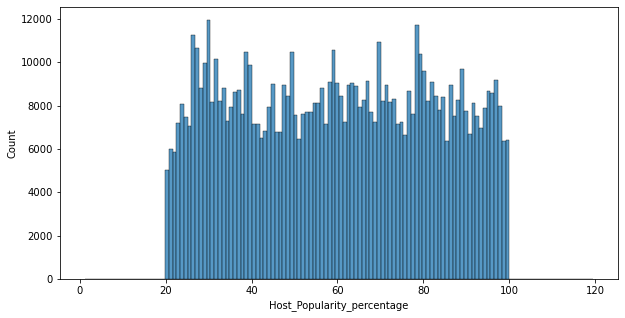

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df["Host_Popularity_percentage"])

In [23]:
df["Host_Popularity_percentage"][df["Host_Popularity_percentage"] > 100]

23925     117.76
79078     118.73
111850    105.57
113304    115.18
123611    112.25
132903    103.00
170608    103.00
176422    117.14
183757    117.76
187862    112.25
206015    114.97
222880    107.02
226171    118.69
321919    117.14
343982    118.93
349735    101.11
369147    117.14
459018    117.14
465407    109.38
483248    112.44
520995    101.31
534237    114.73
538582    119.46
568996    104.60
599478    117.14
Name: Host_Popularity_percentage, dtype: float64

Drop outliers

In [24]:
drop_outliers.append("Host_Popularity_percentage")

In [25]:
df["Publication_Day"].value_counts()

Sunday       115946
Monday       111963
Friday       108237
Wednesday    107886
Thursday     104360
Saturday     103505
Tuesday       98103
Name: Publication_Day, dtype: int64

One Hot Encode

In [26]:
ohe.append("Publication_Day")

In [27]:
df["Publication_Time"].value_counts()

Night        196849
Evening      195778
Afternoon    179460
Morning      177913
Name: Publication_Time, dtype: int64

One Hot Encode

In [28]:
ohe.append("Publication_Time")

<AxesSubplot:ylabel='Frequency'>

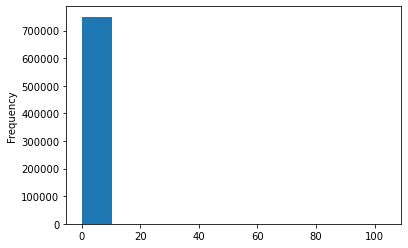

In [29]:
df["Number_of_Ads"].plot(kind="hist")

<AxesSubplot:xlabel='Number_of_Ads'>

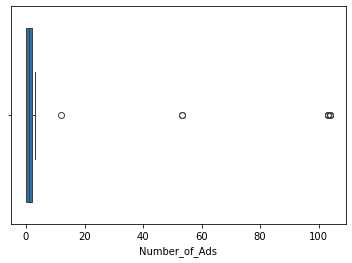

In [30]:
sns.boxplot(df["Number_of_Ads"], orient="h")

<AxesSubplot:ylabel='Frequency'>

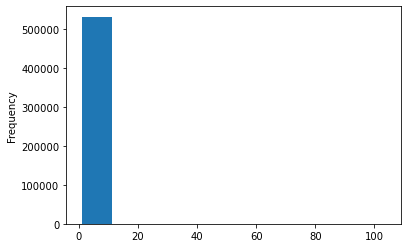

In [31]:
df[df["Number_of_Ads"] > 0]["Number_of_Ads"].plot(kind="hist")

<AxesSubplot:xlabel='Number_of_Ads'>

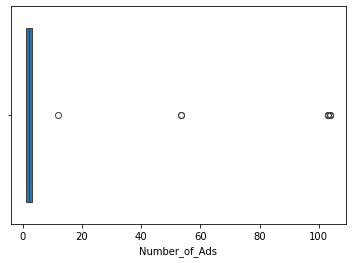

In [32]:
sns.boxplot(df[df["Number_of_Ads"] > 0]["Number_of_Ads"], orient="h")

<AxesSubplot:>

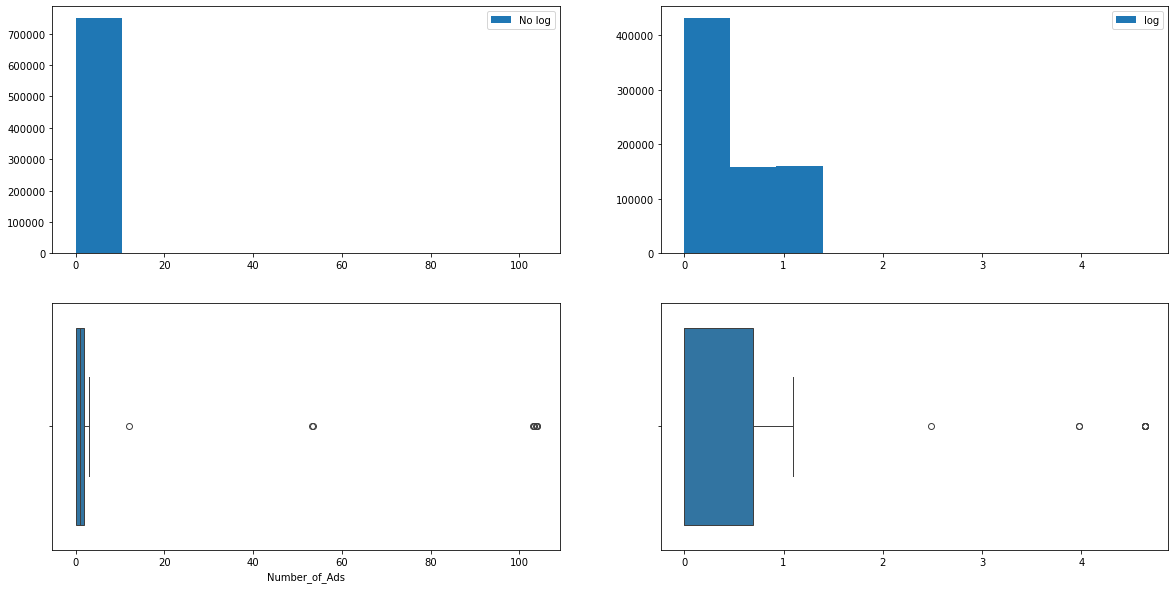

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].hist(df["Number_of_Ads"], label="No log")
ax[0, 0].legend()
sns.boxplot(df["Number_of_Ads"], ax=ax[1][0], orient="h")
ax[0, 1].hist(np.append(np.log(df[df["Number_of_Ads"] > 0]["Number_of_Ads"]), df[df["Number_of_Ads"] == 0]["Number_of_Ads"]), label="log")
ax[0, 1].legend()
sns.boxplot(np.append(np.log(df[df["Number_of_Ads"] > 0]["Number_of_Ads"]), df[df["Number_of_Ads"] == 0]["Number_of_Ads"]), ax=ax[1, 1], orient="h")

In [34]:
np.log(df[df["Number_of_Ads"] > 0]["Number_of_Ads"])

1         0.693147
3         0.693147
4         1.098612
5         1.098612
8         0.693147
            ...   
749988    0.000000
749989    1.098612
749992    1.098612
749994    0.000000
749996    0.693147
Name: Number_of_Ads, Length: 532407, dtype: float64

In [35]:
df[df["Number_of_Ads"] == 0].shape[0]

217592

<AxesSubplot:>

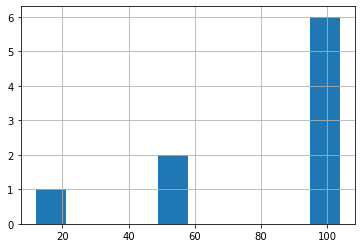

In [36]:
df[df["Number_of_Ads"] > 10]["Number_of_Ads"].hist()

In [37]:
df[df["Number_of_Ads"] > 2]["Number_of_Ads"]

4         3.0
5         3.0
9         3.0
10        3.0
18        3.0
         ... 
749977    3.0
749979    3.0
749980    3.0
749989    3.0
749992    3.0
Name: Number_of_Ads, Length: 160182, dtype: float64

Create new columns: 0 ads, 1 ad, 2 ads, 3 ads, >3 ads

In [38]:
df["Episode_Sentiment"].value_counts()

Neutral     251291
Negative    250116
Positive    248593
Name: Episode_Sentiment, dtype: int64

One hot encode

In [39]:
ohe.append("Episode_Sentiment")

In [1]:
def wrangle(path):
    # Read Data
    data = pd.read_csv(path)
    # Fill in missing values
    data.fillna(data.median(), inplace=True)
    # Handle outliers
    mask_outliers = ["Guest_Popularity_percentage", "Host_Popularity_percentage"]
    for outlier in mask_outliers:
        data = data[data[outlier] <= 100]
    # Bucketize Number of Ads
    data["Number_of_Ads"] = np.where(data["Number_of_Ads"] <= 3, data["Number_of_Ads"].astype(int).astype(str), ">3 ads")
    # More normal
    # data["Episode_Length_minutes"] = data["Episode_Length_minutes"] ** (1 / 1.5)
    return data

In [2]:
def wrangle_eval(path):
    # Read Data
    data = pd.read_csv(path)
    # Fill in missing values
    data.fillna(data.median(), inplace=True)
    # Bucketize Number of Ads
    data["Number_of_Ads"] = np.where(data["Number_of_Ads"] <= 3, data["Number_of_Ads"].astype(int).astype(str), ">3 ads")
    # More normal
    # data["Episode_Length_minutes"] = data["Episode_Length_minutes"] ** (1 / 1.5)
    return data

In [6]:
df_w = wrangle("train.csv")
df_w

C:\Users\User\AppData\Local\Temp\ipykernel_13304\2756108293.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,53.58,0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,53.58,0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,53.58,2,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0,Negative,100.72939


<AxesSubplot:>

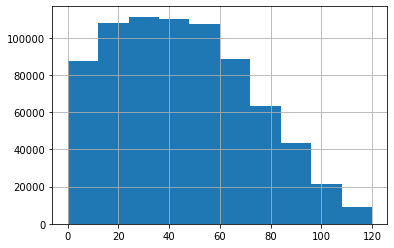

In [43]:
df_w["Listening_Time_minutes"].hist()

In [44]:
ohe.append("Number_of_Ads")

In [7]:
X = df_w.drop(["id", "Listening_Time_minutes"], axis=1)
y = df_w["Listening_Time_minutes"]

In [8]:
y_norm = y ** (1 / 1.5)

<AxesSubplot:>

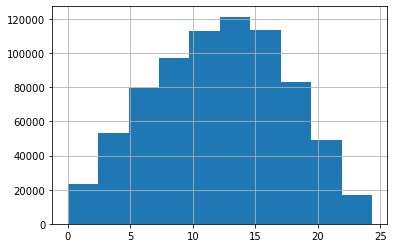

In [47]:
y_norm.hist()

In [48]:
df[ohe]

,Genre,Publication_Day,Publication_Time,Episode_Sentiment,Number_of_Ads
0,True Crime,Thursday,Night,Positive,0.0
1,Comedy,Saturday,Afternoon,Negative,2.0
2,Education,Tuesday,Evening,Negative,0.0
3,Technology,Monday,Morning,Positive,2.0
4,Health,Monday,Afternoon,Neutral,3.0
...,...,...,...,...,...
749995,Education,Saturday,Morning,Negative,0.0
749996,Business,Saturday,Night,Neutral,2.0
749997,Lifestyle,Thursday,Morning,Negative,0.0
749998,Lifestyle,Thursday,Morning,Negative,0.0


In [49]:
df[tar_encode]

,Podcast_Name,Episode_Title
0,Mystery Matters,Episode 98
1,Joke Junction,Episode 26
2,Study Sessions,Episode 16
3,Digital Digest,Episode 45
4,Mind & Body,Episode 86
...,...,...
749995,Learning Lab,Episode 25
749996,Business Briefs,Episode 21
749997,Lifestyle Lounge,Episode 51
749998,Style Guide,Episode 47


In [50]:
X

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,Mystery Matters,Episode 98,15.973322,True Crime,74.81,Thursday,Night,53.58,0,Positive
1,Joke Junction,Episode 26,24.301768,Comedy,66.95,Saturday,Afternoon,75.95,2,Negative
2,Study Sessions,Episode 16,17.610146,Education,69.97,Tuesday,Evening,8.97,0,Negative
3,Digital Digest,Episode 45,16.524065,Technology,57.22,Monday,Morning,78.70,2,Positive
4,Mind & Body,Episode 86,23.028610,Health,80.07,Monday,Afternoon,58.68,3,Neutral
...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,17.888650,Education,69.36,Saturday,Morning,53.58,0,Negative
749996,Business Briefs,Episode 21,17.902833,Business,35.21,Saturday,Night,53.58,2,Neutral
749997,Lifestyle Lounge,Episode 51,9.864028,Lifestyle,78.58,Thursday,Morning,84.89,0,Negative
749998,Style Guide,Episode 47,22.815564,Lifestyle,45.39,Thursday,Morning,93.27,0,Negative


In [51]:
ct = ColumnTransformer([
    ("target_encode", TargetEncoder(), tar_encode),
    ("ohe", OneHotEncoder(), ohe),
    # ("ss", StandardScaler(), make_column_selector(dtype_include=np.number))
],
    remainder="passthrough"        
)
X_ct = ct.fit_transform(X, y)
X_ct

<749956x34 sparse matrix of type '<class 'numpy.float64'>'
	with 7499556 stored elements in Compressed Sparse Row format>

In [52]:
ohed = ct.named_transformers_["ohe"].get_feature_names()
list(ohed)

['x0_Business',
 'x0_Comedy',
 'x0_Education',
 'x0_Health',
 'x0_Lifestyle',
 'x0_Music',
 'x0_News',
 'x0_Sports',
 'x0_Technology',
 'x0_True Crime',
 'x1_Friday',
 'x1_Monday',
 'x1_Saturday',
 'x1_Sunday',
 'x1_Thursday',
 'x1_Tuesday',
 'x1_Wednesday',
 'x2_Afternoon',
 'x2_Evening',
 'x2_Morning',
 'x2_Night',
 'x3_Negative',
 'x3_Neutral',
 'x3_Positive',
 'x4_0',
 'x4_1',
 'x4_2',
 'x4_3',
 'x4_>3 ads']

In [53]:
columns = tar_encode + list(ohed) + ["Episode_Length_minutes", "Host_Popularity_percentage", "Guest_Popularity_percentage"] + []
X_ct = pd.DataFrame(X_ct, columns=columns)

ValueError: Shape of passed values is (749956, 1), indices imply (749956, 34)

In [ ]:
X_ct

In [ ]:
X_ct["Podcast_Name"].plot(kind="hist")

In [ ]:
X_ct["Episode_Title"].plot(kind="hist")

<AxesSubplot:>

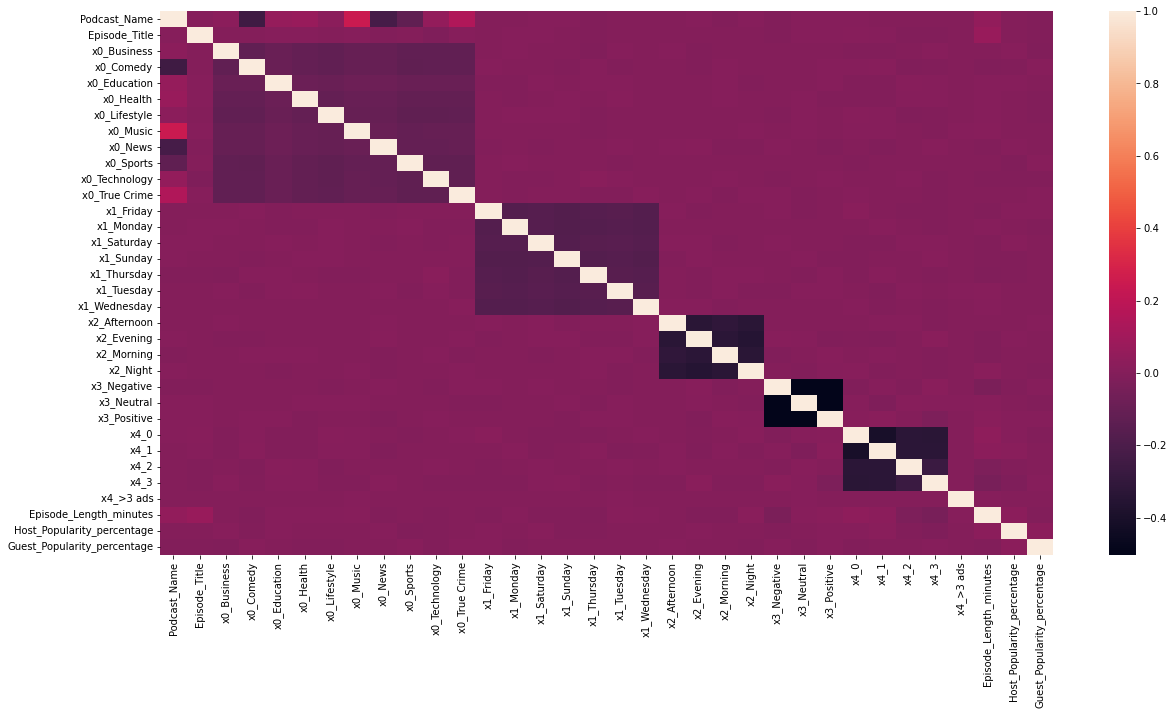

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(X_ct.corr(), ax=ax)

In [ ]:
ridge = Pipeline([
    ("ct", ct),
    ("ss", StandardScaler(with_mean=False)),
    ("ridge", Ridge(random_state=42))
])

In [164]:
np.logspace(np.log(0.003), np.log(0.03), num=50)

array([1.55187597e-06, 1.72921320e-06, 1.92681525e-06, 2.14699784e-06,
       2.39234131e-06, 2.66572087e-06, 2.97034028e-06, 3.30976941e-06,
       3.68798605e-06, 4.10942257e-06, 4.57901783e-06, 5.10227506e-06,
       5.68532636e-06, 6.33500457e-06, 7.05892333e-06, 7.86556632e-06,
       8.76438667e-06, 9.76591775e-06, 1.08818966e-05, 1.21254015e-05,
       1.35110052e-05, 1.50549457e-05, 1.67753166e-05, 1.86922791e-05,
       2.08282983e-05, 2.32084065e-05, 2.58604963e-05, 2.88156478e-05,
       3.21084928e-05, 3.57776204e-05, 3.98660296e-05, 4.44216328e-05,
       4.94978175e-05, 5.51540721e-05, 6.14566828e-05, 6.84795105e-05,
       7.63048565e-05, 8.50244268e-05, 9.47404068e-05, 1.05566659e-04,
       1.17630058e-04, 1.31071975e-04, 1.46049937e-04, 1.62739474e-04,
       1.81336171e-04, 2.02057964e-04, 2.25147695e-04, 2.50875954e-04,
       2.79544254e-04, 3.11488561e-04])

In [165]:
param_ridge = {
    "ridge__alpha": np.logspace(np.log(0.003), np.log(0.03), num=50)
}

In [166]:
ridge_grid = GridSearchCV(estimator=ridge, param_grid=param_ridge, scoring="neg_mean_squared_error", error_score="raise", verbose=1, n_jobs=-1, cv=5)
ridge_grid.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('target_encode',
                                                                         TargetEncoder(),
                                                                         ['Podcast_Name',
                                                                          'Episode_Title']),
                                                                        ('ohe',
                                                                         OneHotEncoder(),
                                                                         ['Genre',
                                                                          'Publication_Day',
                                                                          'Publication_Time',
                            

In [167]:
print(f"Best params: {ridge_grid.best_params_}, best score: {-ridge_grid.best_score_}")

Best params: {'ridge__alpha': 1.551875974757895e-06}, best score: 177.96998013019197


In [ ]:
ridge = ridge_grid.best_estimator_

In [ ]:
ridge_importances = pd.DataFrame(sorted(np.stack((abs(ridge.named_steps["ridge"].coef_), columns), axis=1), key=lambda x: x[0]), dtype=float)
ridge_importances

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(width=ridge_importances[0], y=ridge_importances[1])

In [327]:
dump(ridge, "ridge")

In [54]:
svr = Pipeline([
    ("ct", ct),
    ("ss", StandardScaler(with_mean=False)),
    ("svr", SVR(kernel="linear"))
])

In [61]:
np.logspace(-3, 2, num=50)

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

In [62]:
param_svr = {
    "svr__kernel": ["linear", "rbf", "poly"],
    "svr__C": np.logspace(-3, 2, num=50),
    "svr__epsilon": np.logspace(-3, 2, num=50)
}

In [ ]:
svr_grid = RandomizedSearchCV(svr, param_distributions=param_svr, n_iter=60, scoring="neg_mean_squared_error", cv=3, n_jobs=-1, verbose=1)
svr_grid.fit(X, y)

In [168]:
decision_tree = Pipeline([
    ("ct", ct),
    ("decision_tree", DecisionTreeRegressor(random_state=42, max_depth=11, min_samples_leaf=0.001))
])
decision_tree

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_encode',
                                                  TargetEncoder(),
                                                  ['Podcast_Name',
                                                   'Episode_Title']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['Genre', 'Publication_Day',
                                                   'Publication_Time',
                                                   'Episode_Sentiment',
                                                   'Number_of_Ads']),
                                                 ('poly', PolynomialFeatures(),
                                                  ['Episode_Length_minutes'])])),
                ('decision_tree',
                 DecisionTreeRegressor(max_depth=11, min_samples_leaf=0.001,
       

In [170]:
params_tree = {
    "decision_tree__max_depth": range(9, 15),
    "decision_tree__min_samples_leaf": np.logspace(-3, -2, num=10)
}

In [171]:
decision_tree_grid = GridSearchCV(decision_tree, param_grid=params_tree, cv=3, n_jobs=-1, scoring="neg_mean_squared_error", error_score="raise", verbose=1)
decision_tree_grid.fit(X, y)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('target_encode',
                                                                         TargetEncoder(),
                                                                         ['Podcast_Name',
                                                                          'Episode_Title']),
                                                                        ('ohe',
                                                                         OneHotEncoder(),
                                                                         ['Genre',
                                                                          'Publication_Day',
                                                                          'Publication_Time',
                            

In [172]:
print(f"Best params: {decision_tree_grid.best_params_}, best score: {-decision_tree_grid.best_score_}")

Best params: {'decision_tree__max_depth': 11, 'decision_tree__min_samples_leaf': 0.001}, best score: 173.72789251946662


Best params: {'decision_tree__max_depth': 11, 'decision_tree__min_samples_leaf': 0.001}, best score: 173.7278183682347

In [52]:
decision_tree.fit(X, y)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_encode',
                                                  TargetEncoder(),
                                                  ['Podcast_Name',
                                                   'Episode_Title']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['Genre', 'Publication_Day',
                                                   'Publication_Time',
                                                   'Episode_Sentiment',
                                                   'Number_of_Ads'])])),
                ('decision_tree',
                 DecisionTreeRegressor(max_depth=11, min_samples_leaf=0.001,
                                       random_state=42))])

In [53]:
dump(decision_tree, "decision_tree")

<BarContainer object of 34 artists>

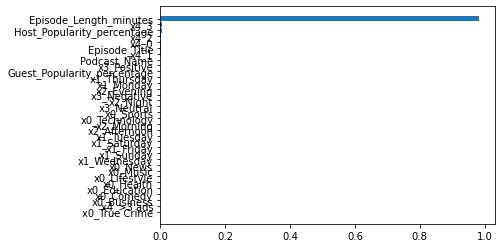

In [73]:
# decision_tree = decision_tree_grid.best_estimator
decision_tree_importances = decision_tree.named_steps["decision_tree"].feature_importances_
decision_tree_importances = pd.DataFrame(np.stack((decision_tree_importances, columns), axis=1))
decision_tree_importances[0] = decision_tree_importances[0].astype(float)
decision_tree_importances.sort_values(0, inplace=True)
plt.barh(width=decision_tree_importances[0], y=decision_tree_importances[1])

In [59]:
random_forest = Pipeline([
    ("ct", ct),
    ("random_forest", RandomForestRegressor(random_state=42, n_estimators=200, max_depth=11))
])
random_forest

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_encode',
                                                  TargetEncoder(),
                                                  ['Podcast_Name',
                                                   'Episode_Title']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['Genre', 'Publication_Day',
                                                   'Publication_Time',
                                                   'Episode_Sentiment',
                                                   'Number_of_Ads'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=11, n_estimators=200,
                                       random_state=42))])

In [56]:
params_forest = {
    "random_forest__n_estimators": range(100, 210, 10),
    "random_forest__max_depth": range(2, 20)
}

In [60]:
random_val = cross_val_score(random_forest, X, y, scoring="neg_mean_squared_error", cv=3, verbose=2, n_jobs=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=94.4min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 94.4min remaining:    0.0s


[CV] END ................................................... total time=101.3min
[CV] END .................................................... total time=99.3min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 295.1min finished


In [61]:
print(f"Cross val results for n_estimators=200, max_depth=11 {random_val}")

Cross val results for n_estimators=200, max_depth=11 [-172.39846813 -171.7751282  -170.34147669]


Cross val results for n_estimators=200, max_depth=11 [-172.39846813 -171.7751282  -170.34147669]

In [62]:
random_forest.fit(X, y)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_encode',
                                                  TargetEncoder(),
                                                  ['Podcast_Name',
                                                   'Episode_Title']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['Genre', 'Publication_Day',
                                                   'Publication_Time',
                                                   'Episode_Sentiment',
                                                   'Number_of_Ads'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=11, n_estimators=200,
                                       random_state=42))])

In [63]:
dump(random_forest, "random_forest")

In [122]:
extra_trees = Pipeline([
    ("ct", ct),
    ("extra_trees", ExtraTreesRegressor(random_state=42, n_estimators=130, max_depth=12))
])

In [53]:
t0 = time.time()
extra_trees.fit(X, y)
print(time.time() - t0)

1206.6371829509735


In [51]:
params_extra_trees = {
    "extra_trees__n_estimators": range(100, 210, 10),
    "extra_trees__max_depth": range(2, 15)
}

In [52]:
extra_trees_grid = RandomizedSearchCV(extra_trees, n_iter=5, param_distributions=params_extra_trees, cv=3, n_jobs=-1, scoring="neg_mean_squared_error", error_score="raise", verbose=2)
extra_trees_grid.fit(X, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('target_encode',
                                                                               TargetEncoder(),
                                                                               ['Podcast_Name',
                                                                                'Episode_Title']),
                                                                              ('ohe',
                                                                               OneHotEncoder(),
                                                                               ['Genre',
                                                                                'Publication_Day',
                                                        

In [54]:
print(f"Best params: {extra_trees_grid.best_params_}, best score: {-extra_trees_grid.best_score_}")

Best params: {'extra_trees__n_estimators': 130, 'extra_trees__max_depth': 12}, best score: 172.91873073758936


Best params: {'extra_trees__n_estimators': 130, 'extra_trees__max_depth': 12}, best score: 172.91873073758936


In [123]:
extra_trees.fit(X, y)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_encode',
                                                  TargetEncoder(),
                                                  ['Podcast_Name',
                                                   'Episode_Title']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['Genre', 'Publication_Day',
                                                   'Publication_Time',
                                                   'Episode_Sentiment',
                                                   'Number_of_Ads'])])),
                ('extra_trees',
                 ExtraTreesRegressor(max_depth=12, n_estimators=130,
                                     random_state=42))])

In [124]:
dump(extra_trees, "extra_trees")

In [60]:
cat_boost = Pipeline([
    ("ct", ct),
    ("cbr", CatBoostRegressor(random_state=42, l2_leaf_reg=3, iterations=1700, early_stopping_rounds=10, depth=15, silent=True))
])

In [72]:
params_cbr = {
    "cbr__iterations": range(1000, 2001, 100),
    "cbr__depth": range(5, 17),
    "cbr__l2_leaf_reg": [3],
    "cbr__early_stopping_rounds": [10]
}

In [73]:
cat_boost_grid = RandomizedSearchCV(cat_boost, param_distributions=params_cbr, cv=3, scoring="neg_mean_squared_error", n_iter=10, n_jobs=-1, random_state=42, error_score="raise")
cat_boost_grid.fit(X, y)

0:	learn: 26.5291596	total: 1.1s	remaining: 31m 3s
1:	learn: 25.9417826	total: 1.84s	remaining: 26m 2s
2:	learn: 25.3807284	total: 2.33s	remaining: 21m 58s
3:	learn: 24.8419833	total: 2.8s	remaining: 19m 46s
4:	learn: 24.3215659	total: 3.28s	remaining: 18m 31s
5:	learn: 23.8178570	total: 3.75s	remaining: 17m 39s
6:	learn: 23.3367378	total: 4.2s	remaining: 16m 56s
7:	learn: 22.8750348	total: 4.66s	remaining: 16m 25s
8:	learn: 22.4300543	total: 5.22s	remaining: 16m 20s
9:	learn: 22.0019729	total: 5.67s	remaining: 15m 58s
10:	learn: 21.5902531	total: 6.13s	remaining: 15m 41s
11:	learn: 21.1980978	total: 6.58s	remaining: 15m 25s
12:	learn: 20.8198552	total: 7.06s	remaining: 15m 16s
13:	learn: 20.4556377	total: 7.53s	remaining: 15m 7s
14:	learn: 20.1072284	total: 7.99s	remaining: 14m 57s
15:	learn: 19.7745034	total: 8.43s	remaining: 14m 47s
16:	learn: 19.4545419	total: 8.88s	remaining: 14m 39s
17:	learn: 19.1512337	total: 9.34s	remaining: 14m 32s
18:	learn: 18.8578167	total: 9.67s	remaining

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('ct',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('target_encode',
                                                                               TargetEncoder(),
                                                                               ['Podcast_Name',
                                                                                'Episode_Title']),
                                                                              ('ohe',
                                                                               OneHotEncoder(),
                                                                               ['Genre',
                                                                                'Publication_Day',
                                                        

In [74]:
print(f"Best params: {cat_boost_grid.best_params_}, best score: {-cat_boost_grid.best_score_}")

Best params: {'cbr__l2_leaf_reg': 3, 'cbr__iterations': 1700, 'cbr__early_stopping_rounds': 10, 'cbr__depth': 15}, best score: 167.8963070553117


Best params: {'cbr__l2_leaf_reg': 3, 'cbr__iterations': 1000, 'cbr__depth': 14}, best score: 168.459805742231

In [75]:
cat_boost = cat_boost_grid.best_estimator_

In [77]:
dump(cat_boost, "cat_boost")

In [10]:
ridge = load("ridge")
decision_tree = load("decision_tree")
random_forest = load("random_forest")
cat_boost = load("cat_boost")
extra_trees = load("extra_trees")

In [125]:
residuals_ridge = ridge.predict(X) - y
residuals_decision_tree = decision_tree.predict(X) - y
residuals_random_forest = random_forest.predict(X) - y
residuals_cat_boost = cat_boost.predict(X) - y
residuals_extra_trees = extra_trees.predict(X) - y

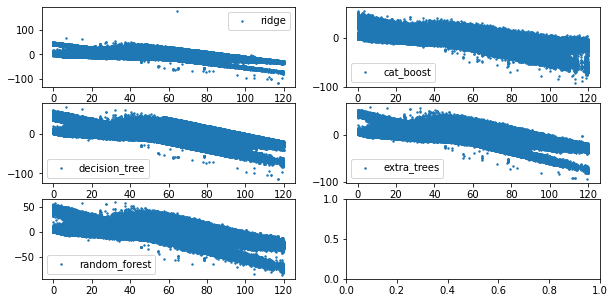

In [133]:
fig, ax = plt.subplots(3, 2, figsize=(10, 5))
ax[0, 0].scatter(y, residuals_ridge, label="ridge", s=2)
ax[0, 0].legend()
ax[1, 0].scatter(y, residuals_decision_tree, label="decision_tree", s=2)
ax[1, 0].legend()
ax[2, 0].scatter(y, residuals_random_forest, label="random_forest", s=2)
ax[2, 0].legend()
ax[0, 1].scatter(y, residuals_cat_boost, label="cat_boost", s=2)
ax[0, 1].legend()
ax[1, 1].scatter(y, residuals_extra_trees, label="extra_trees", s=2)
ax[1, 1].legend()

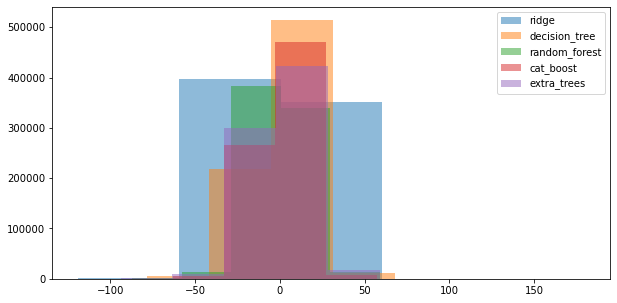

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(residuals_ridge, label="ridge", alpha=0.5, bins=5)
ax.hist(residuals_decision_tree, label="decision_tree", alpha=0.5, bins=5)
ax.hist(residuals_random_forest, label="random_forest", alpha=0.5, bins=5)
ax.hist(residuals_cat_boost, label="cat_boost", alpha=0.5, bins=5)
ax.hist(residuals_extra_trees, label="extra_trees", alpha=0.5, bins=5)
ax.legend()

In [55]:
voting_regressor = VotingRegressor([
    ("ridge", ridge),
    ("decision_tree", decision_tree),
    # ("random_forest", random_forest),
    ("cbr", cat_boost)
])

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model_combinations = [(ridge, decision_tree, cat_boost), 
                      (ridge, random_forest, cat_boost), 
                      (decision_tree, random_forest, cat_boost), 
                      (ridge, decision_tree, random_forest, cat_boost),
                      (ridge, decision_tree, extra_trees, cat_boost),
                      (decision_tree, extra_trees, cat_boost),
                      (ridge, extra_trees, cat_boost)
]

In [ ]:
voting_results = []
for combination in model_combinations:
    voting_regressor = VotingRegressor([(f"{model}", model) for model in combination])
    voting_regressor.fit(X_train, y_train)
    mse = mean_squared_error(voting_regressor.predict(X_val), y_val)
    print(f"combination: {combination}, error: {mse}")
    voting_results.append([combination, mse])

In [89]:
voting_results[sorted((x[1], i) for i, x in enumerate(voting_results))[0][1]]

[(Pipeline(steps=[('ct',
                   ColumnTransformer(remainder='passthrough',
                                     transformers=[('target_encode',
                                                    TargetEncoder(),
                                                    ['Podcast_Name',
                                                     'Episode_Title']),
                                                   ('ohe', OneHotEncoder(),
                                                    ['Genre', 'Publication_Day',
                                                     'Publication_Time',
                                                     'Episode_Sentiment',
                                                     'Number_of_Ads'])])),
                  ('decision_tree',
                   DecisionTreeRegressor(max_depth=11, min_samples_leaf=0.001,
                                         random_state=42))]),
  Pipeline(steps=[('ct',
                   ColumnTransformer(remainder='passt

In [11]:
voting_regressor = VotingRegressor([
    ("decision_tree", decision_tree),
    ("random_forest", random_forest),
    ("cbr", cat_boost)
])
voting_regressor.fit(X, y)

0:	learn: 26.5291596	total: 658ms	remaining: 18m 37s
1:	learn: 25.9417826	total: 1.14s	remaining: 16m 9s
2:	learn: 25.3807284	total: 1.64s	remaining: 15m 26s
3:	learn: 24.8419833	total: 2.12s	remaining: 14m 58s
4:	learn: 24.3215659	total: 2.6s	remaining: 14m 42s
5:	learn: 23.8178570	total: 3.08s	remaining: 14m 29s
6:	learn: 23.3367378	total: 3.57s	remaining: 14m 22s
7:	learn: 22.8750348	total: 4.04s	remaining: 14m 15s
8:	learn: 22.4300543	total: 4.29s	remaining: 13m 26s
9:	learn: 22.0019729	total: 4.77s	remaining: 13m 25s
10:	learn: 21.5902531	total: 5.25s	remaining: 13m 25s
11:	learn: 21.1980978	total: 5.73s	remaining: 13m 25s
12:	learn: 20.8198552	total: 6.21s	remaining: 13m 26s
13:	learn: 20.4556377	total: 6.7s	remaining: 13m 27s
14:	learn: 20.1072284	total: 7.18s	remaining: 13m 26s
15:	learn: 19.7745034	total: 7.67s	remaining: 13m 26s
16:	learn: 19.4545419	total: 8.15s	remaining: 13m 27s
17:	learn: 19.1512337	total: 8.63s	remaining: 13m 26s
18:	learn: 18.8578167	total: 8.8s	remaini

VotingRegressor(estimators=[('decision_tree',
                             Pipeline(steps=[('ct',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('target_encode',
                                                                               TargetEncoder(),
                                                                               ['Podcast_Name',
                                                                                'Episode_Title']),
                                                                              ('ohe',
                                                                               OneHotEncoder(),
                                                                               ['Genre',
                                                                                'Publication_Day',
                                                        

In [12]:
test = wrangle_eval("test.csv")
test

C:\Users\User\AppData\Local\Temp\ipykernel_13304\2170966059.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,53.36,0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,Mind & Body,Episode 100,21.05,Health,65.77,Saturday,Evening,96.40,3,Negative
249996,999996,Joke Junction,Episode 85,85.50,Comedy,41.47,Saturday,Night,30.52,2,Negative
249997,999997,Joke Junction,Episode 63,12.11,Comedy,25.92,Thursday,Evening,73.69,1,Neutral
249998,999998,Market Masters,Episode 46,113.46,Business,43.47,Friday,Night,93.59,3,Positive


In [13]:
X_test = test.drop("id", axis=1)

In [14]:
pd.DataFrame({
    "id": test["id"],
    "Listening_Time_minutes": voting_regressor.predict(X_test)
}).to_csv("voting_regressor3.csv", index=False)